## Sample 5.3 Single parameter Bayesian model---A sample of Coma cluster

sigma of cz= 1316.8409611736695


Text(0.5, 0, 'redshift (km/s)')

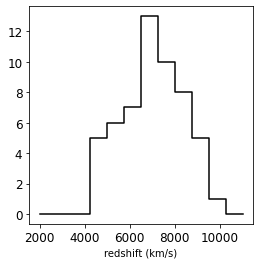

In [8]:
%matplotlib inline
#posteior distribution of normal data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
from astropy.table import Table

## the mean redshift of Coma cluster
filename = 'ComaCluster.fits'
coma = Table.read(filename)
cz = coma["czA"][(coma["czA"]<20000) & (coma["czA"]>0)]
sig_cz = np.var(cz)
print("sigma of cz=",np.sqrt(sig_cz))
czgrid =np.arange(2000.,12000.,750.)
h, xedge = np.histogram(cz, bins=czgrid)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.step(czgrid[:-1],h,'k',where='post')
ax.set_xlabel('redshift (km/s)')
# fig.show()

 _RAJ2000 _DEJ2000  S     ID   f_ID  PT ...  czA   e_czA  S/N  MType A06 Simbad
   deg      deg                         ... km / s km / s                      
--------- -------- --- ------- ---- --- ... ------ ------ ---- ----- --- ------
 194.8585 28.01778  Mm  132151        4 ...   5486    130  6.3   ImV   1 Simbad
194.87846 28.04187  Mm  133494        2 ...   6549     77 44.6   E     0 Simbad
194.88221 27.96338  Mm  190797        3 ...   8860     74  5.0   dE    1 Simbad
194.89312 27.99539  Mm  191169        2 ...   5225     61 15.3   dE    1 Simbad
194.89679 27.98063  Mm  192254        3 ...   7355    110  4.5   dE    1 Simbad
194.90867 27.94901  Mm  194749        3 ...   6128     79  7.1   dE    1 Simbad
194.91092 27.94962  Mm 1038885    e   2 ...   6718     47  5.1   dE    1 Simbad
194.92612 28.01515  Mm  122743        4 ...   7934     77 40.7   E     1 Simbad
194.92887  27.9984  Mm  195506        2 ...   8497     83 11.3   dE    0 Simbad
194.93308 27.96721  Mm  196718        2 

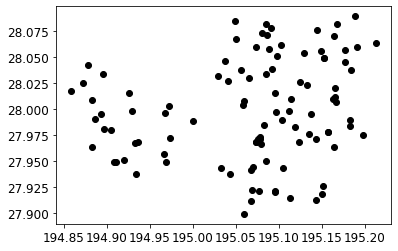

In [7]:
print(coma)
plt.plot(coma['_RAJ2000'],coma['_DEJ2000'],'ko')
plt.show()

In [3]:
#known sigma ask for mean redshift

n = len(cz)
sig = 1317.0
tao_0 = 1000.0
mu_0 = 6925.0
mu_n = (1./tao_0**2*mu_0+n/sig**2*np.mean(cz))/\
    (1./tao_0**2+n/sig**2)
tao_n = np.sqrt(1./(1./tao_0**2+n/sig**2))
print('n=%(n)d\ny_bar=%(yb).2f\nmu_0=%(m0).2f\nmu_n=%(m1).2f\nsigma=%(s).2f\ntao_0=%(t0).2f\ntao_n=%(tn).2f' %\
      {'n':n, 'yb':np.mean(cz), 'm1': mu_n, 'm0': mu_0,\
       's':sig,'t0':tao_0,'tn':tao_n})


n=55
y_bar=7004.75
mu_0=6925.00
mu_n=7002.31
sigma=1317.00
tao_0=1000.00
tao_n=174.85


Text(0.5, 0, 'redshift (km/s)')

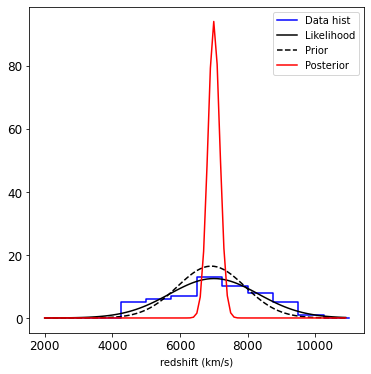

In [5]:
#p(theta|sigma,y)
czgrid2 = np.arange(2000,11000,100)
y_0 = stats.norm(loc=mu_0,scale=tao_0).pdf(czgrid2)
y_n = stats.norm(loc=mu_n,scale=tao_n).pdf(czgrid2)
y_data = stats.norm(loc=np.mean(cz),scale=sig).pdf(czgrid2)


fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
e0, = ax.step(czgrid[:-1],h,'b',where='post')
e1, = ax.plot(czgrid2,y_data/np.sum(y_data)*np.sum(h)/100*750,'k')
e2, = ax.plot(czgrid2,y_0/np.sum(y_0)*np.sum(h)/100*750,'k--')
e3, = ax.plot(czgrid2,y_n/np.sum(y_n)*np.sum(h)/100*750,'r')
plt.legend([e0,e1,e2,e3],['Data hist','Likelihood','Prior','Posterior'])
ax.set_xlabel('redshift (km/s)')
# fig.show()